# Expression Parameter Sharing Test

Check if sharing parameters between an observed and unobserved RV that share prior parameters results in the unobservedRV having a t-distribution when provided ~10 observations.

# Inputs

In [17]:
import pymc3 as pm
import seaborn as sns
import scipy.stats as st
import pandas as pd

In [2]:
df = pd.read_hdf('/mnt/data/Objects/tcga_gtex_tpm_norm_filt.hd5')
df.head(2)

,id,tissue,subtype,tumor,label,RP11-40C6.2,IGHG1,IGKC,KRT5,IGLC2,...,IGHEP1,RP11-44N21.4,GAPDHP61,P2RX5-TAX1BP3,RP11-408H20.3,RP13-726E6.2,CTB-43E15.1,ZNF878,OR2H2,RP4-530I15.9
GTEX-UTHO-1226-SM-3GAEE,GTEX-UTHO-1226-SM-3GAEE,Heart,Heart_Atrial_Appendage,no,gtex,0.000000,10.302941,10.712460,2.750618,7.780669,...,0.000000,0.0,0.0,0.150556,0.0,0.000000,0.0,0.070387,0.790754,0.815589
GTEX-146FH-1726-SM-5QGQ2,GTEX-146FH-1726-SM-5QGQ2,Esophagus,Esophagus_Mucosa,no,gtex,2.970847,8.778885,10.445933,12.393268,8.440056,...,0.176318,0.0,0.0,0.411426,0.0,0.176318,0.0,0.622930,0.042644,0.378503


In [3]:
gtex = df[df.label == 'gtex']
normal = df[df.label == 'tcga-normal']
tumor = df[df.label == 'tcga-tumor']

# Test

Build Model

In [5]:
with pm.Model() as model:
    # Shared priors
    mu = pm.Normal('mu', 3, 3)
    sd = pm.Uniform('sd', 0, 10)
    
    # Posterior
    x = pm.Normal('x', mu=mu, sd=sd, observed=gtex['TP53'][:10])
    y = pm.Normal('y', mu=mu, sd=sd)
    
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y, sd, mu]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1544.49draws/s]
The acceptance probability does not match the target. It is 0.8798827897925217, but should be close to 0.8. Try to increase the number of tuning steps.


Fit T-Distribution

In [24]:
t_fit = st.t.fit(trace['y'])
t_samples = st.t.rvs(*t_fit, 2000)

Compare t-fit to trace density

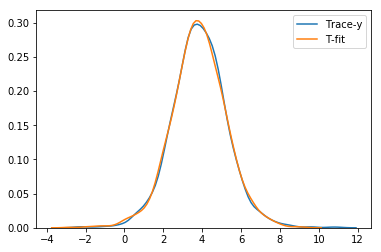

In [25]:
sns.kdeplot(trace['y'], label='Trace-y')
sns.kdeplot(t_samples, label='T-fit')

Traceplot

/home/ubuntu/anaconda3/envs/pan-normal/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


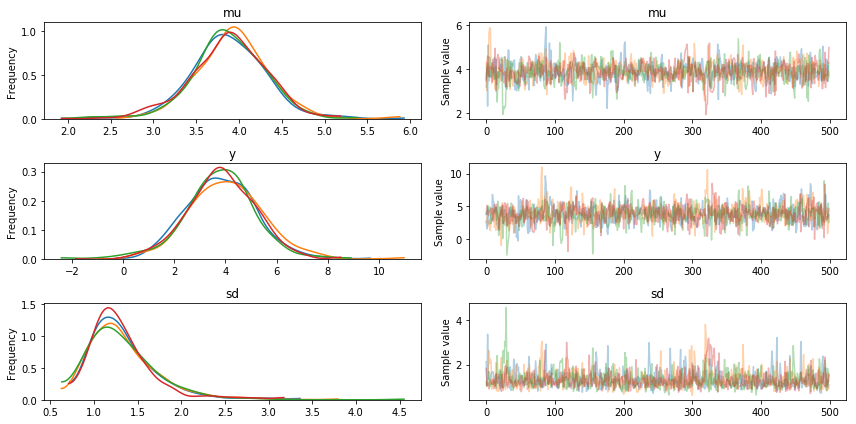

In [7]:
pm.traceplot(trace);